In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.

Multiple linear regression is a fundamental practice for this dataset. Multivariate analysis can also be performed

In [74]:
df = pd.read_csv('Fish.csv')

In [75]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Видим, что перед нами представлен небольшой датасет на 159 строк, включающих в себя float и object формат данных. Также отмечаем, что у нас отсутсвуют нулевые значения.

In [77]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [78]:
df['Weight'].nunique()

101

Видим, что большая часть целевой переменной Weight имеет уникальные значения, однако встречаются и повторяющиеся

<AxesSubplot:xlabel='Species', ylabel='count'>

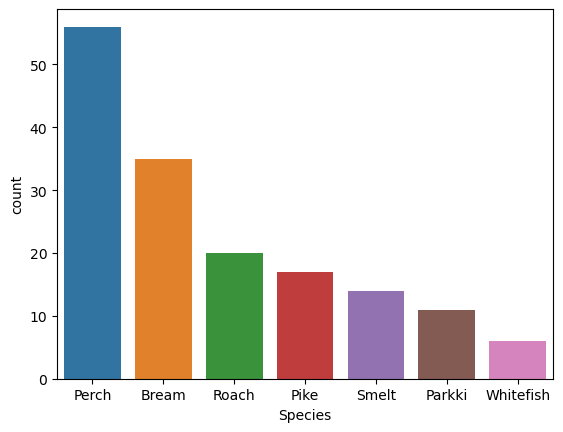

In [79]:
sns.countplot(data = df, x = 'Species', order=df['Species'].value_counts().index)

Проверим наш датасет на наличие выбросов

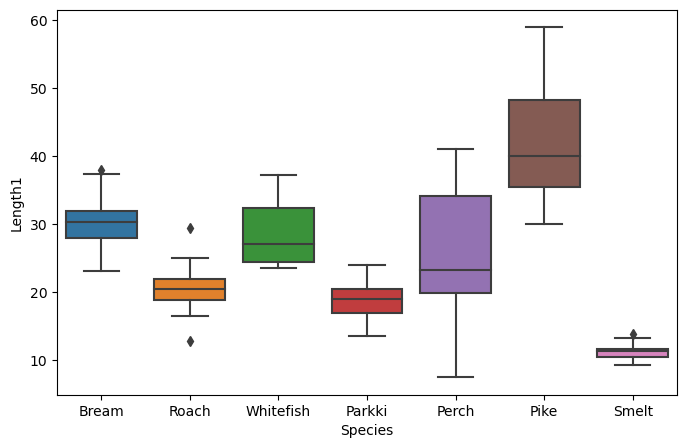

In [80]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'Species',y = 'Length1',data=df);

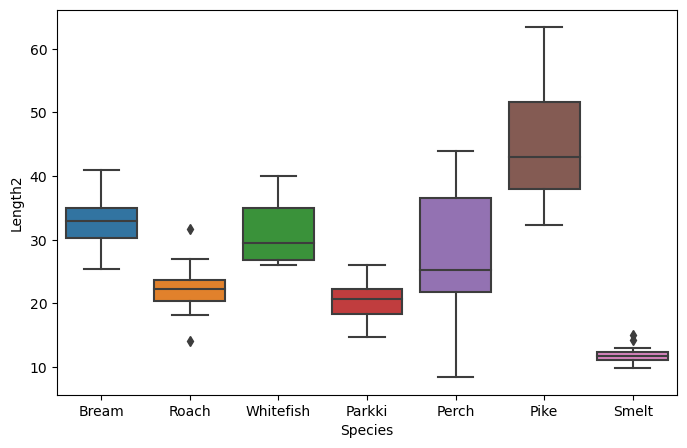

In [81]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'Species',y = 'Length2',data=df);

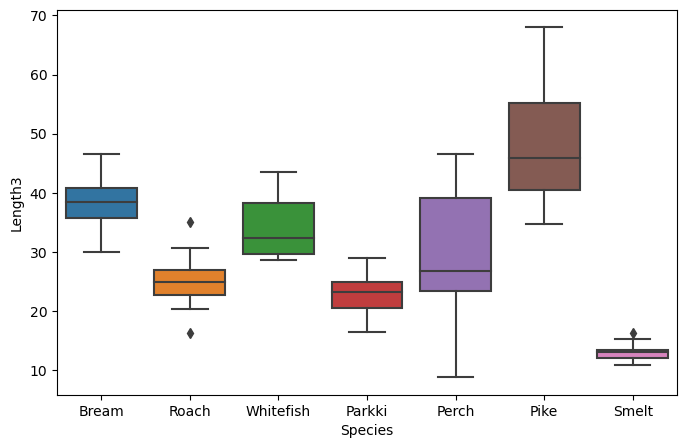

In [82]:
plt.figure(figsize = (8, 5))
sns.boxplot(x = 'Species',y = 'Length3',data=df);

Обращаем внимание, что для всех трех Length Roach и Smelt мы наблюдаются выбросы, а также ждя Bream  в случае Legth1

Проведем обработку выбросов

In [83]:
def outliers(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return df[ (df[col]<lower_bound) | (df[col]>upper_bound) ]

In [84]:
numeric_columns=df._get_numeric_data().columns
for col in numeric_columns:
    print('#'*20, col)
    print(outliers(df, col))

#################### Weight
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length1
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length2
    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480
#################### Length3
    Species  Weight  Length1  Length2  Length3  Height  Width
144    Pike  1650.0     59.0     63.4     68.0  10.812   7.48
#################

Видим, что выбросы представлены в строках 142, 143 и 144, в связи с чем далее удалим их

In [85]:
df.drop([142, 143, 144], inplace=True)


Проверяем, что мы не удалили ничего лишнего

In [86]:
df.shape

(156, 7)

Посмотрим на корреляцию целевой переменной Weight с остальными признаками

<AxesSubplot:>

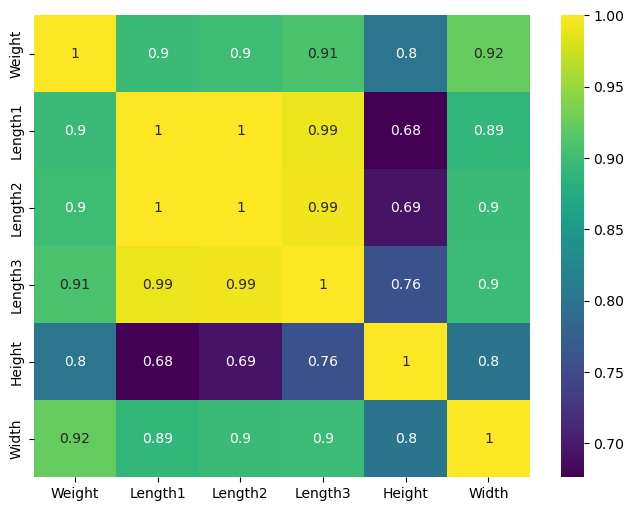

In [87]:
plt.figure(figsize = (8, 6))
sns.heatmap(data = df.corr(), annot=True, cmap = 'viridis')

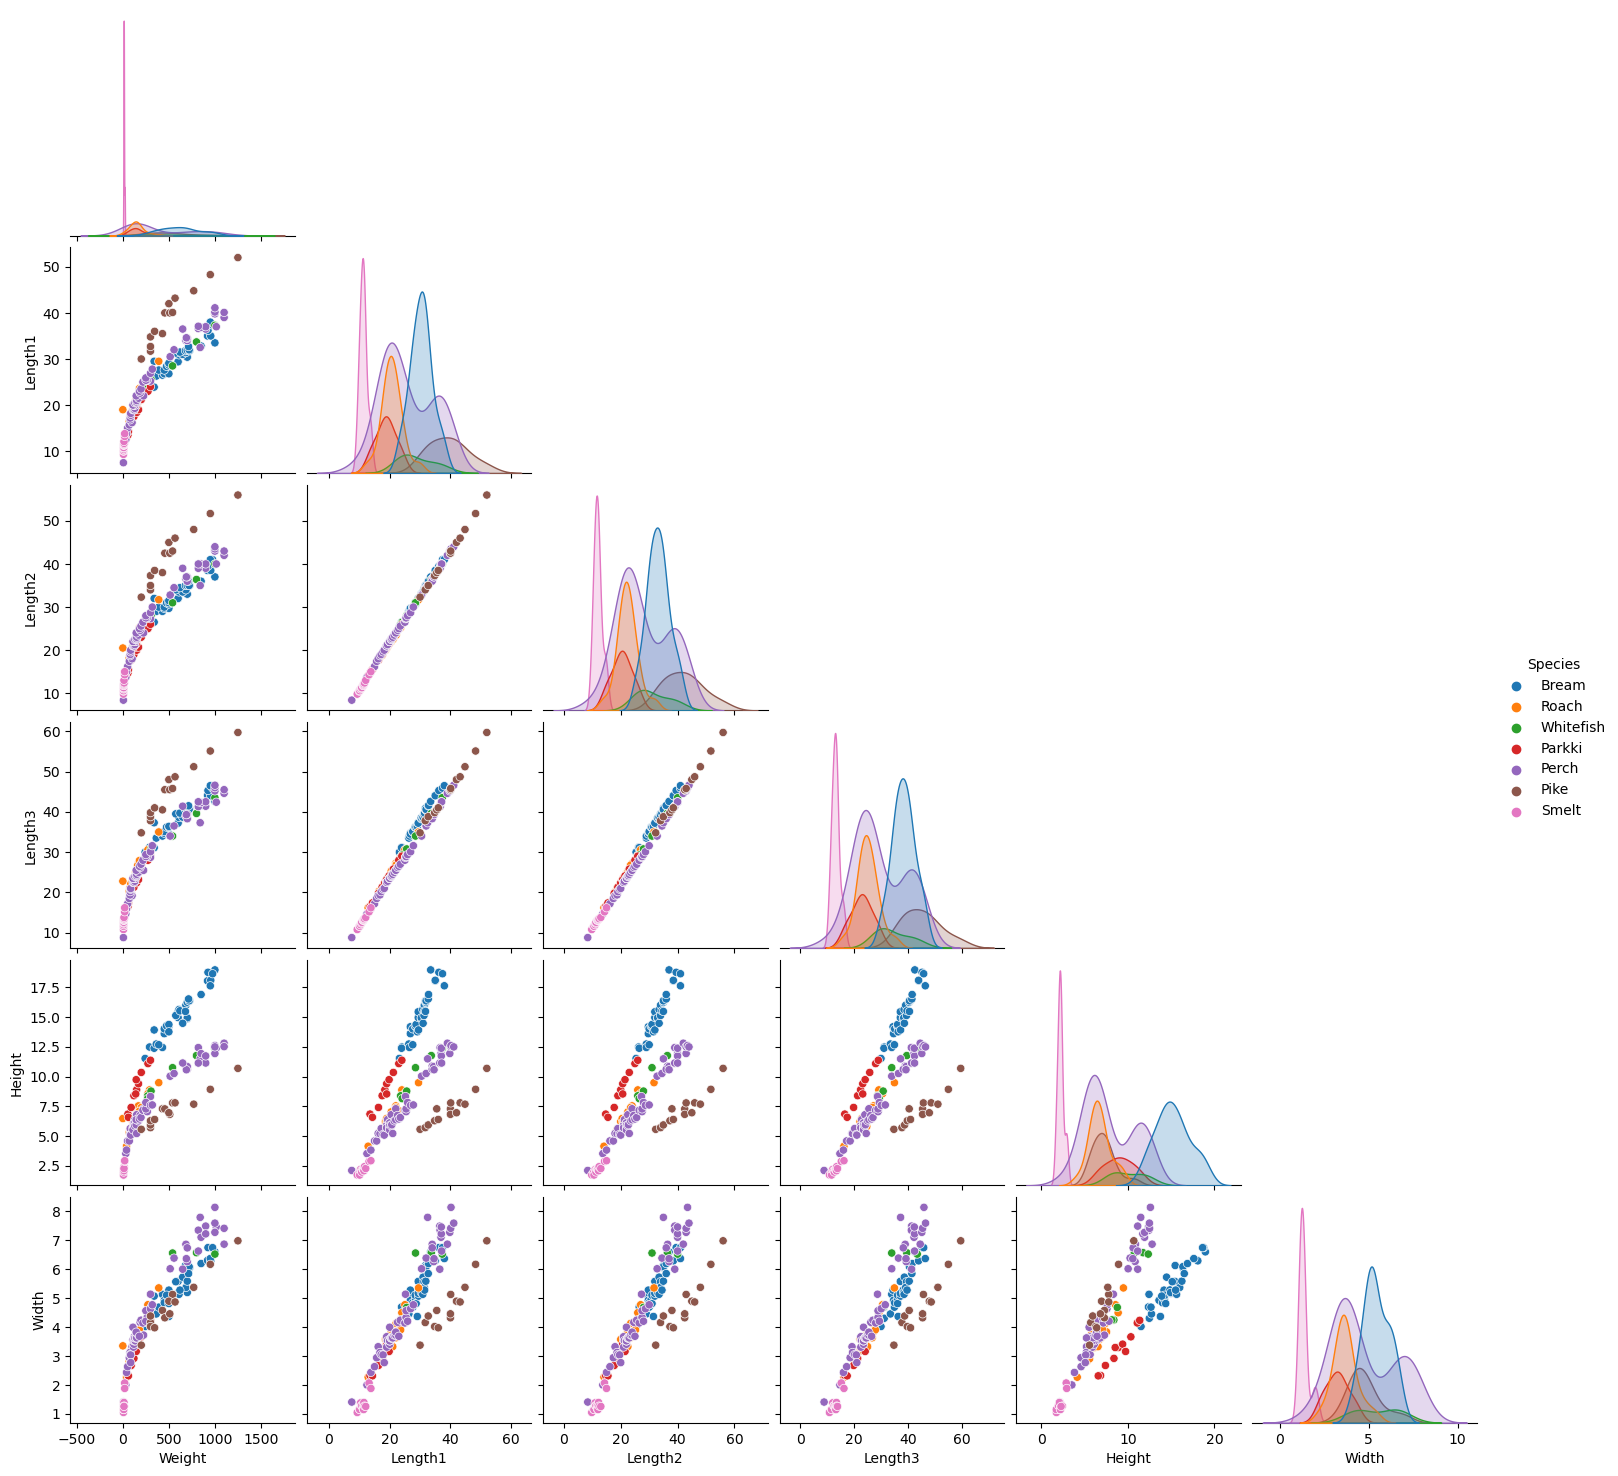

In [88]:
sns.pairplot(df, corner=True, hue = 'Species');

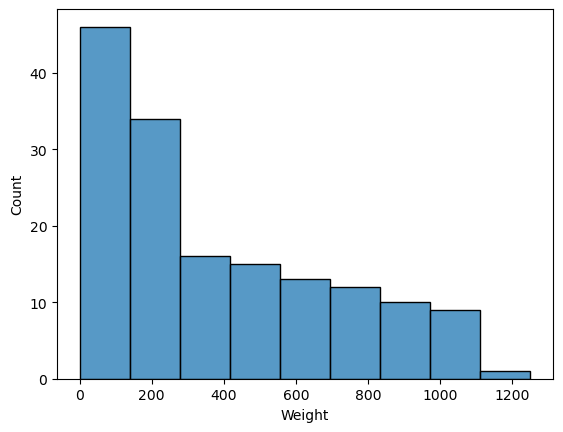

In [89]:
sns.histplot(df.Weight);

Видим, что что представленные весовые категории распределены неравномерно, в связи с чем, чем тяжелее рыба, тем хуже предскзание, так как для весов больше 300 (предположим кг) данных гораздо меньше

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import shap

In [91]:
X = df.drop(['Weight'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Weight']

## Линейная регрессия

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [93]:
scaler = StandardScaler()

In [94]:
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [95]:
model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],
                    eps= 0.01,
                    n_alphas=100,
                    max_iter=1000000)

In [96]:
model.fit(X_train_sc,y_train)

ElasticNetCV(eps=0.01, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1],
             max_iter=1000000)

In [97]:
print(f' Best l1_ratio: {model.l1_ratio_}')
print(f' Best alpha: {model.alpha_}')

 Best l1_ratio: 0.99
 Best alpha: 2.905408597658683


Видим, что Lasso регуляризации отдается бóльшее предпочтении, при построении данной модели

In [98]:
test_predictions = model.predict(X_test_sc)

In [99]:
m = round(df['Weight'].mean(), 2)
print(f'Mean weight: {m}')
print(f'MAE: {mean_absolute_error(y_test,test_predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,test_predictions))}')


Mean weight: 375.22
MAE: 62.14392453956554
RMSE: 85.19877174943572


In [100]:
y_train_pred=model.predict(X_train_sc)

In [101]:
print(f'Train error: {round(r2_score(y_train, y_train_pred), 2)}')
print(f'Test error: {round(r2_score(y_test, test_predictions), 2)}')

Train error: 0.94
Test error: 0.94


Наша модель предсказывает значения с ошибкой в 16.5%, а коэффициент корреляции достаточно близок к единице (0.94).

Значения оценки работы модели MAE и RMSE достаточно близки друг к другу, что говорит об отсутсвии выбросов, для которых модель ошибается

## Визуализация

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


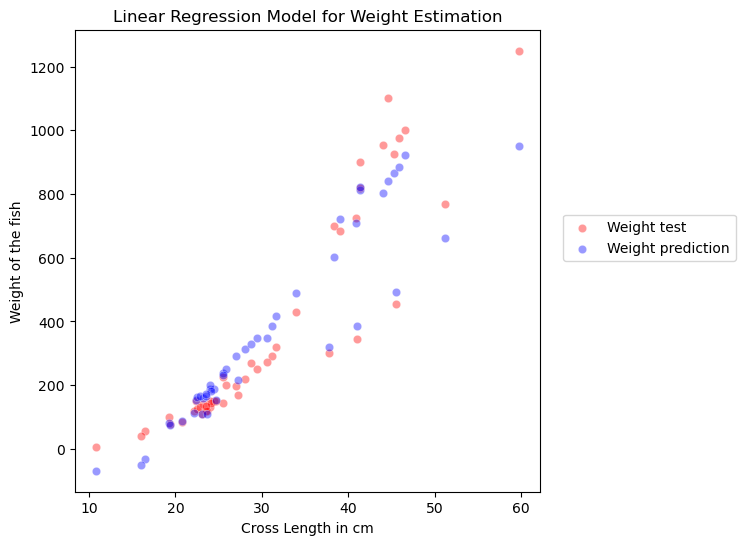

In [102]:
plt.figure(figsize = (6, 6))
sns.scatterplot(X_test['Length3'], y_test, color='red', alpha=0.4)
sns.scatterplot(X_test['Length3'], test_predictions, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend(['Weight test', 'Weight prediction'], loc = (1.05, 0.5));

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


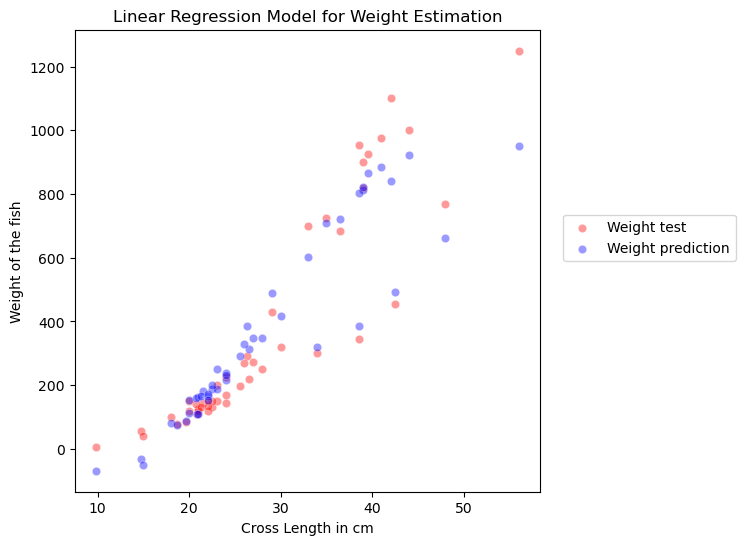

In [103]:
plt.figure(figsize = (6, 6))
sns.scatterplot(X_test['Length2'], y_test, color='red', alpha=0.4)
sns.scatterplot(X_test['Length2'], test_predictions, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend(['Weight test', 'Weight prediction'], loc = (1.05, 0.5));

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


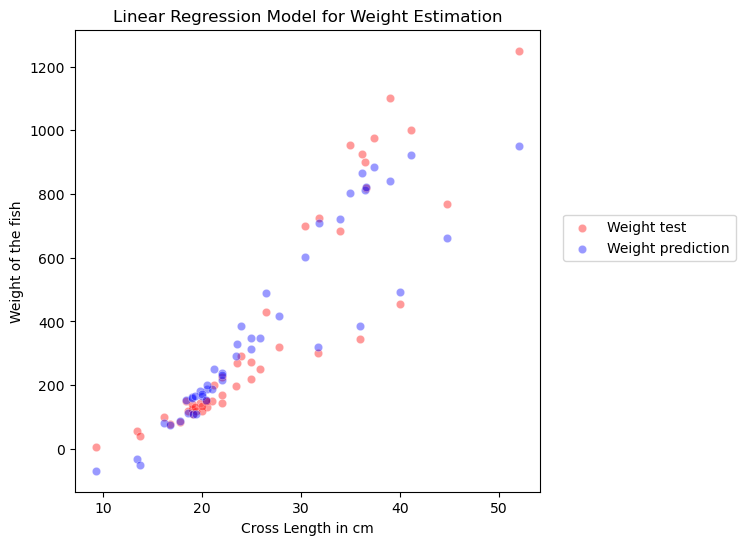

In [104]:
plt.figure(figsize = (6, 6))
sns.scatterplot(X_test['Length1'], y_test, color='red', alpha=0.4)
sns.scatterplot(X_test['Length1'], test_predictions, color='blue', alpha=0.4)
plt.xlabel('Cross Length in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend(['Weight test', 'Weight prediction'], loc = (1.05, 0.5));

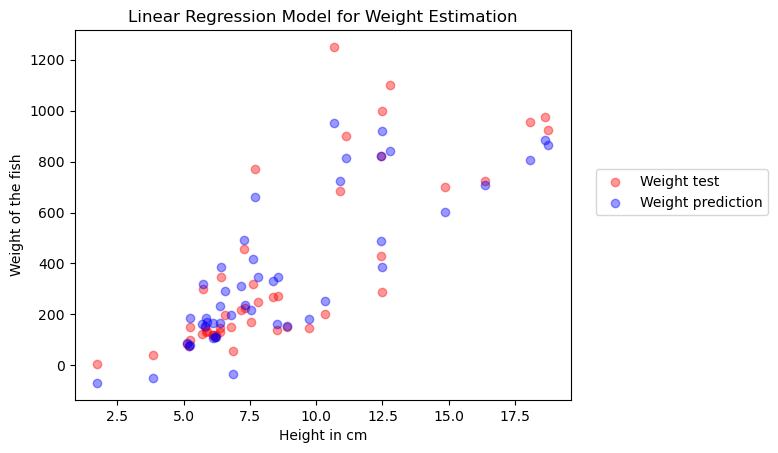

In [105]:
plt.scatter(X_test['Height'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Height'], y_test_pred, color='blue', alpha=0.4)
plt.xlabel('Height in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend(['Weight test', 'Weight prediction'], loc = (1.05, 0.5));

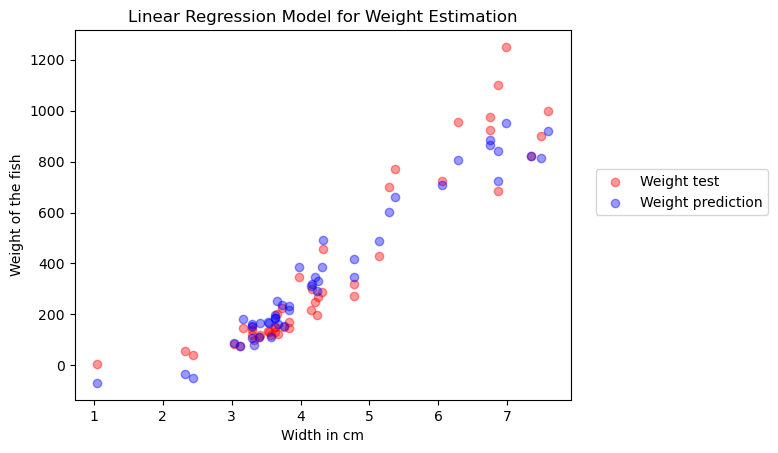

In [106]:
plt.scatter(X_test['Width'], y_test, color='red', alpha=0.4)
plt.scatter(X_test['Width'], y_test_pred, color='blue', alpha=0.4)
plt.xlabel('Width in cm')
plt.ylabel('Weight of the fish')
plt.title('Linear Regression Model for Weight Estimation')
plt.legend(['Weight test', 'Weight prediction'], loc = (1.05, 0.5));

In [107]:
model.coef_

array([ 66.19763   ,  61.25318647,  37.30449855,  61.49217405,
       122.69805262,   0.        ,   6.58832799, -24.8376769 ,
        -8.69642731,  66.4204443 ,   3.71137005])

In [108]:
X_train_summary = shap.kmeans(X_train, 10)
ex = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0,:])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0,:])

  0%|          | 0/47 [00:00<?, ?it/s]

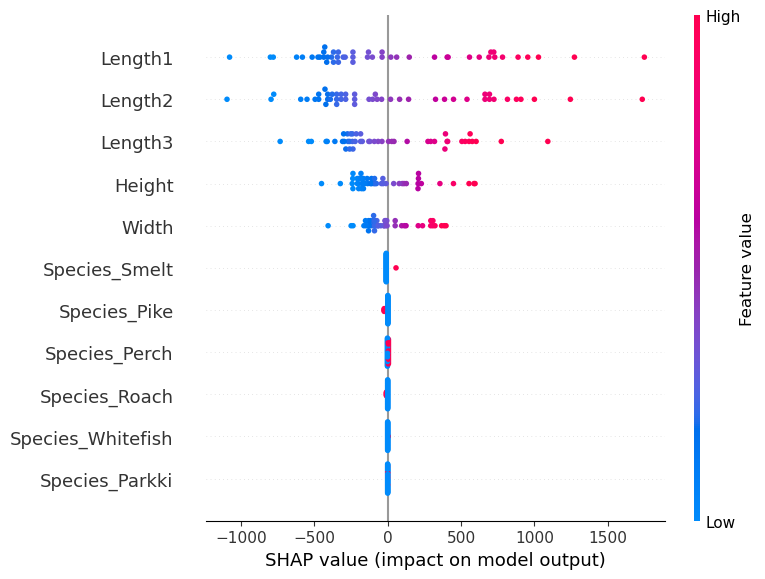

In [109]:
X_train_summary = shap.kmeans(X_train, 10)
ex = shap.KernelExplainer(model.predict, X_train_summary)
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)